In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [64]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fbb0538160>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [65]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fbb04fd580>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [66]:
# Use the session to query Measurement table and display the first 15 trade volumes
for row in session.query(Measurement.id, Measurement.station, Measurement.date,\
                         Measurement.tobs, Measurement.prcp).limit(15).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 65.0, 0.08)
(2, 'USC00519397', '2010-01-02', 63.0, 0.0)
(3, 'USC00519397', '2010-01-03', 74.0, 0.0)
(4, 'USC00519397', '2010-01-04', 76.0, 0.0)
(5, 'USC00519397', '2010-01-06', 73.0, None)
(6, 'USC00519397', '2010-01-07', 70.0, 0.06)
(7, 'USC00519397', '2010-01-08', 64.0, 0.0)
(8, 'USC00519397', '2010-01-09', 68.0, 0.0)
(9, 'USC00519397', '2010-01-10', 73.0, 0.0)
(10, 'USC00519397', '2010-01-11', 64.0, 0.01)
(11, 'USC00519397', '2010-01-12', 61.0, 0.0)
(12, 'USC00519397', '2010-01-14', 66.0, 0.0)
(13, 'USC00519397', '2010-01-15', 65.0, 0.0)
(14, 'USC00519397', '2010-01-16', 68.0, 0.0)
(15, 'USC00519397', '2010-01-17', 64.0, 0.0)


In [67]:
# Use the session to query Dow table and display the first 15 trade volumes
for row in session.query(Station.id, Station.station, Station.name,Station.longitude,\
                         Station.latitude, Station.elevation ).limit(15).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 21.5213, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 21.33556, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', -157.84888999999998, 21.45167, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', -157.9992, 21.3152, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', -157.8025, 21.3331, 152.4)


# Exploratory Precipitation Analysis

In [68]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
lastyear = dt.date(2017,8, 23) - dt.timedelta(days = 365)
precipitation = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > lastyear).order_by(Measurement.date).all()
precipitation[0]
for row in session.query(Measurement.date, Measurement.prcp).limit(10).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)


In [70]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation,columns=["Date","Prcp"])
precipitation_df.dropna(inplace=True)
precipitation_df.head(10)


,Date,Prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00
10,2016-08-25,0.00


In [71]:
# Set the index to the date column
precipitation_df.set_index('Date')
precipitation_df = precipitation_df.sort_index(ascending = False)
precipitation_df.head(10)

,Date,Prcp
2222,2017-08-23,0.45
2221,2017-08-23,0.08
2220,2017-08-23,0.00
2219,2017-08-23,0.00
2218,2017-08-22,0.50
2217,2017-08-22,0.00
2216,2017-08-22,0.00
2215,2017-08-21,0.56
2213,2017-08-21,0.02
2212,2017-08-21,0.00


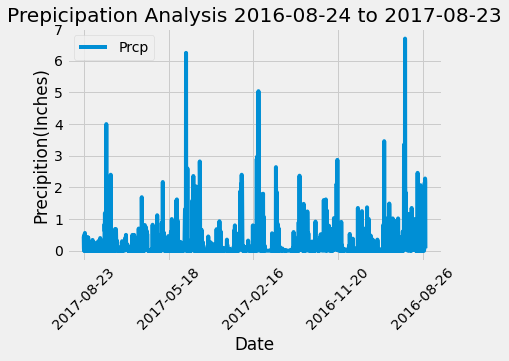

In [72]:
# Use Pandas Plotting with Matplotlib to plot the data
#precipitation_df.plot(rot=45)
#plt.savefig("Precipitation analysis.png")
#plt.show()

precipitation_df.plot('Date','Prcp')
plt.plot(figsize = (15,10))
#plt.tight_layout()
plt.title("Prepicipation Analysis 2016-08-24 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipition(Inches)")
plt.xticks(rotation = 45)
plt.show
plt.savefig("Images/precipitation_graph.png", bbox_inches = 'tight')

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station).count()
num_stations

9

In [90]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = (session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
most_active_station = most_active_stations[0][0]

print(f"Most active station " + most_active_station + " with " + str(most_active_stations[0][1]) + " observations.")
print("List of stations in Hawai based on number of data collections.")
# List the stations and the counts in descending order.
for row in most_active_stations:
    print(f"Station id: {row[0:1]}, number of counts: {row[1:2]}")

Most active station USC00519281 with 2772 observations.
List of stations in Hawai based on number of data collections.
Station id: ('USC00519281',), number of counts: (2772,)
Station id: ('USC00519397',), number of counts: (2724,)
Station id: ('USC00513117',), number of counts: (2709,)
Station id: ('USC00519523',), number of counts: (2669,)
Station id: ('USC00516128',), number of counts: (2612,)
Station id: ('USC00514830',), number of counts: (2202,)
Station id: ('USC00511918',), number of counts: (1979,)
Station id: ('USC00517948',), number of counts: (1372,)
Station id: ('USC00518838',), number of counts: (511,)


In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > lastyear).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()
temperature_df=pd.DataFrame(temperature,columns=["station","date", "tobs"])
temperature_df = temperature_df.sort_index(ascending = False)                                         
temperature_df.head(10)

,station,date,tobs
350,USC00519281,2017-08-18,79.0
349,USC00519281,2017-08-17,76.0
348,USC00519281,2017-08-16,76.0
347,USC00519281,2017-08-15,77.0
346,USC00519281,2017-08-14,77.0
345,USC00519281,2017-08-13,77.0
344,USC00519281,2017-08-06,83.0
343,USC00519281,2017-08-05,82.0
342,USC00519281,2017-08-04,77.0
341,USC00519281,2017-07-31,76.0


In [113]:
#Calculate minimum, maximum, and average temperatures for most active station based on last year's data
temperature_min = round(temperature_df["tobs"].min(), 2)
temperature_max = round(temperature_df["tobs"].max(), 2)
temperature_mean = round(temperature_df["tobs"].mean(), 2)
print("Staion USC00519281 min temperature: " + str(temperature_min))
print("Staion USC00519281 max temperature: " + str(temperature_max))
print("Staion USC00519281 average temperature: " + str(temperature_mean))

Staion USC00519281 min temperature: 59.0
Staion USC00519281 max temperature: 83.0
Staion USC00519281 average temperature: 73.1


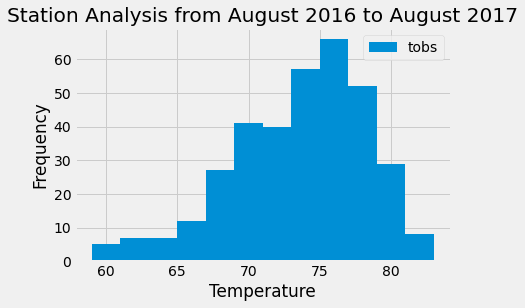

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Please note: data has been queried two steps before
#temperature_df.set_index('date')
temperature_df.set_index('date')
temperature_df.plot.hist(bins = 12)
plt.title("Station Analysis from August 2016 to August 2017")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("Images/station_histogram.png", bbox_inches = 'tight')




# Close session

In [125]:
# Close Session
session.close()